In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("Open DataTRA2.csv")

In [ ]:
# Convert columns to numeric, forcing errors to NaN
df['Omani'] = pd.to_numeric(df['Omani'], errors='coerce')
df['Non-omani'] = pd.to_numeric(df['Non-omani'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Optionally recalculate totals to verify
df['Calculated Total'] = df['Omani'].fillna(0) + df['Non-omani'].fillna(0)
df['Mismatch'] = df['Total'] != df['Calculated Total']

# Show rows where the totals mismatch
print("\nRows with total mismatches:")
print(df[df['Mismatch']])

# Fill missing values (if you want to replace NaNs with 0)
df[['Omani', 'Non-omani', 'Total']] = df[['Omani', 'Non-omani', 'Total']].fillna(0).astype(int)

# Drop helper columns if not needed
df.drop(columns=['Calculated Total', 'Mismatch'], inplace=True)

# Final check
print("\nCleaned dataset preview:")
print(df.head())


Missing values per column:
 Company name    0
Year            0
Omani           2
Non-omani       6
Total           0
dtype: int64

Rows with total mismatches:
Empty DataFrame
Columns: [Company name, Year, Omani, Non-omani, Total, Calculated Total, Mismatch]
Index: []

Cleaned dataset preview:
                          Company name  Year  Omani  Non-omani  Total
0                            Oman Post  2021    267          8    275
1  DHL Worldwide Express & company LLC  2021    102         37    139
2                 Aramex Muscat L.L.C.  2021     77         53    130
3                Elite Enterprises LLC  2021     26         26     52
4         Oman Postal Express (Fed Ex)  2021     42         30     72


In [ ]:
total_employees = df['Total'].sum()
omani_ratio = df['Omani'].sum() / total_employees * 100
non_omani_ratio = df['Non-omani'].sum() / total_employees * 100


In [ ]:
print(f"Total employees: {total_employees}")
print(f"Omani: {omani_ratio:.2f}% | Non-Omani: {non_omani_ratio:.2f}%")

Total employees: 9062
Omani: 81.73% | Non-Omani: 18.27%


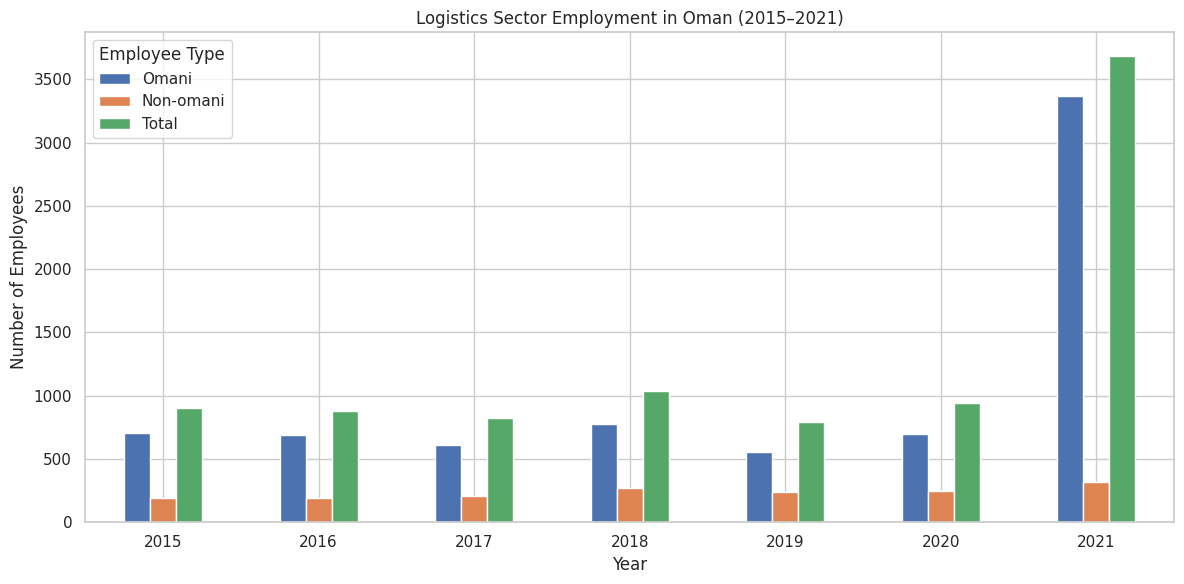

In [ ]:
import matplotlib.pyplot as plt

# Group by Year and sum employment
yearly_totals = df.groupby("Year")[["Omani", "Non-omani", "Total"]].sum()

# Plot
yearly_totals.plot(kind="bar", figsize=(12, 6))
plt.title("Logistics Sector Employment in Oman (2015–2021)")
plt.ylabel("Number of Employees")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title="Employee Type")
plt.tight_layout()
plt.show()


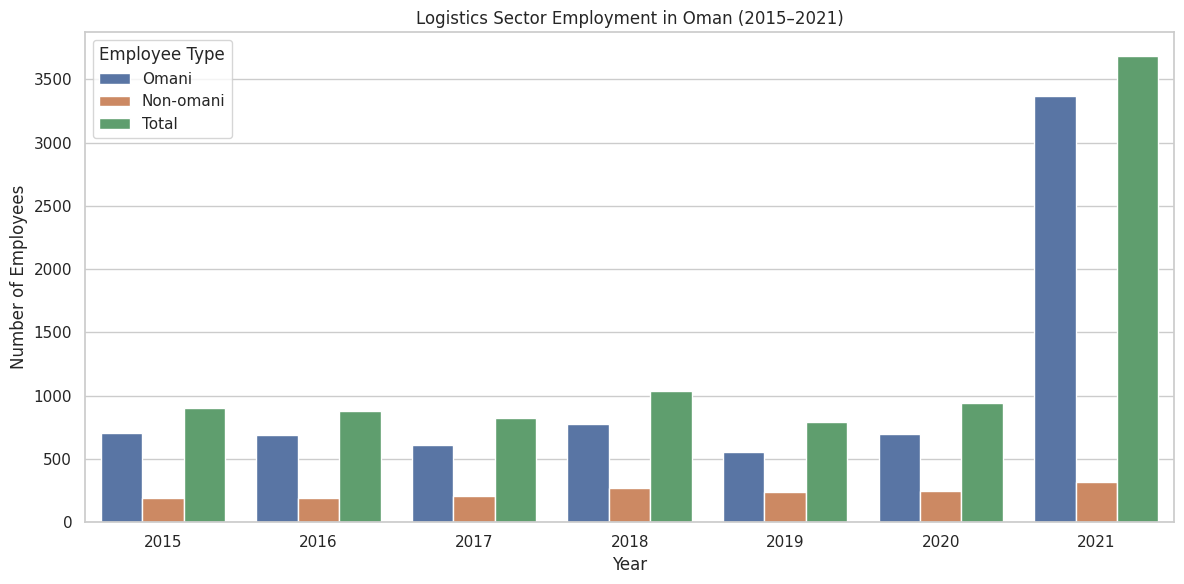

In [ ]:
# Prepare data
yearly_totals = df.groupby("Year")[["Omani", "Non-omani", "Total"]].sum().reset_index()
yearly_totals = yearly_totals.melt(id_vars="Year", var_name="Category", value_name="Employees")

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_totals, x="Year", y="Employees", hue="Category")
plt.title("Logistics Sector Employment in Oman (2015–2021)")
plt.ylabel("Number of Employees")
plt.xlabel("Year")
plt.legend(title="Employee Type")
plt.tight_layout()
plt.show()


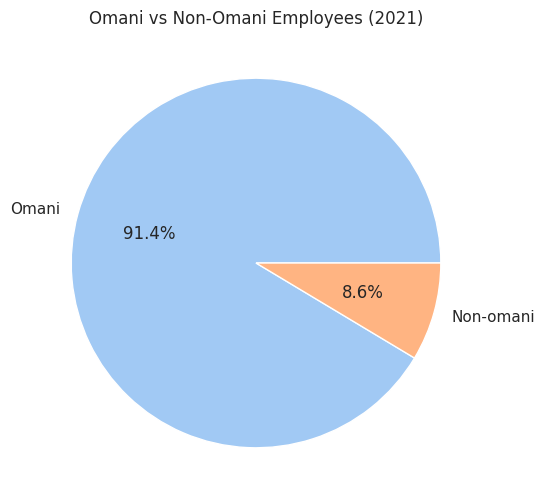

In [ ]:
# Pie chart stays in matplotlib
data_2021 = df[df["Year"] == 2021]
total_2021 = data_2021[["Omani", "Non-omani"]].sum()

colors = sns.color_palette("pastel")
total_2021.plot(kind='pie', autopct='%1.1f%%', colors=colors, figsize=(6,6), title="Omani vs Non-Omani Employees (2021)")
plt.ylabel("")
plt.show()


In [ ]:
df["Omanization (%)"] = (df["Omani"] / df["Total"]) * 100


<ipython-input-22-335f021445cb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


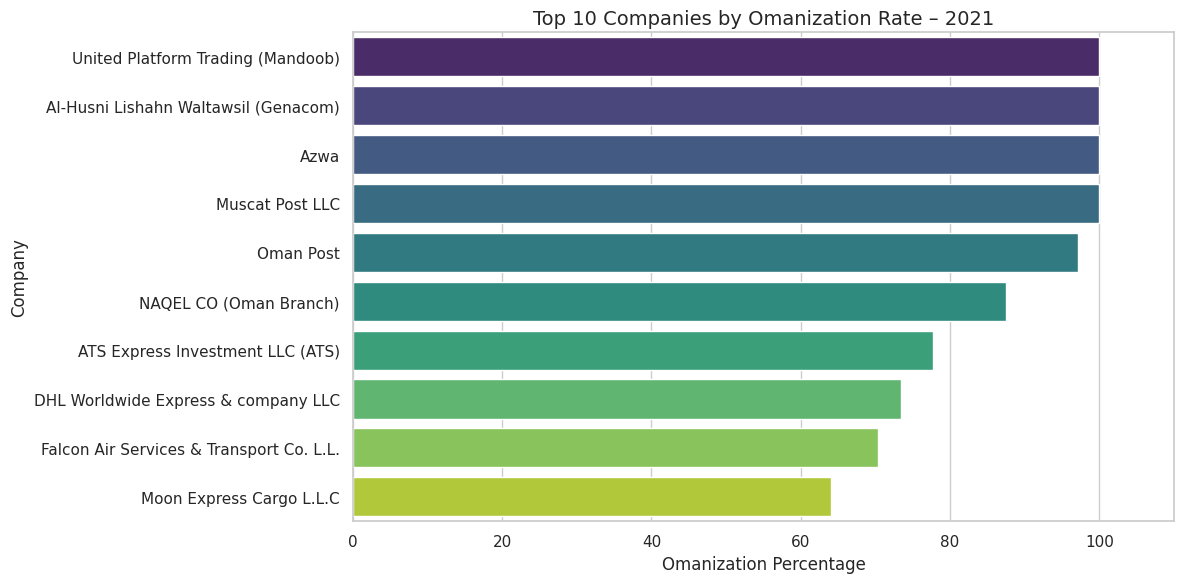

In [ ]:
df_2021 = df[df["Year"] == 2021].copy()

# Clean up missing or zero totals
df_2021 = df_2021[df_2021["Total"] > 0]

# Calculate Omanization rate
df_2021["Omanization (%)"] = (df_2021["Omani"] / df_2021["Total"]) * 100

# Sort by highest Omanization
top_omanized = df_2021.sort_values("Omanization (%)", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_omanized,
    x="Omanization (%)",
    y="Company name",
    palette="viridis"
)
plt.title("Top 10 Companies by Omanization Rate – 2021", fontsize=14)
plt.xlabel("Omanization Percentage")
plt.ylabel("Company")
plt.xlim(0, 110)
plt.tight_layout()
plt.show()